# ナイーブベイズクラス分類機

In [1]:
# おまじない
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from sklearn.model_selection import train_test_split
from IPython.display import display
%matplotlib notebook

In [2]:
X = np.array([
    [0,1,0,1],
    [1,0,1,1],
    [0,0,0,1],
    [1,0,1,0]
])
y = np.array([0,1,0,1])

In [3]:
counts = {}
for label in np.unique(y):
    # クラスに対してループ
    # それぞれの特徴量ごとに非ゼロの数を（加算で）数える
    counts[label] = X[y == label].sum(axis=0)
print('Feature counts:{}'.format(counts))

Feature counts:{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


# 決定木

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)
print('Accuracy of Training set: {:.3f}'.format(tree.score(X_train,y_train)))
print('Accuracy of Test set : {:.3f}'.format(tree.score(X_test,y_test)))

Accuracy of Training set: 1.000
Accuracy of Test set : 0.937


In [5]:
tree = DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(X_train,y_train)
print('Accuracy of Training set: {:.3f}'.format(tree.score(X_train,y_train)))
print('Accuracy of Test set : {:.3f}'.format(tree.score(X_test,y_test)))

Accuracy of Training set: 0.988
Accuracy of Test set : 0.951


In [6]:
from sklearn.tree import export_graphviz
export_graphviz(tree,out_file='tree.dot',class_names=['malignant','benign'],feature_names=cancer.feature_names,impurity=False,filled=True)

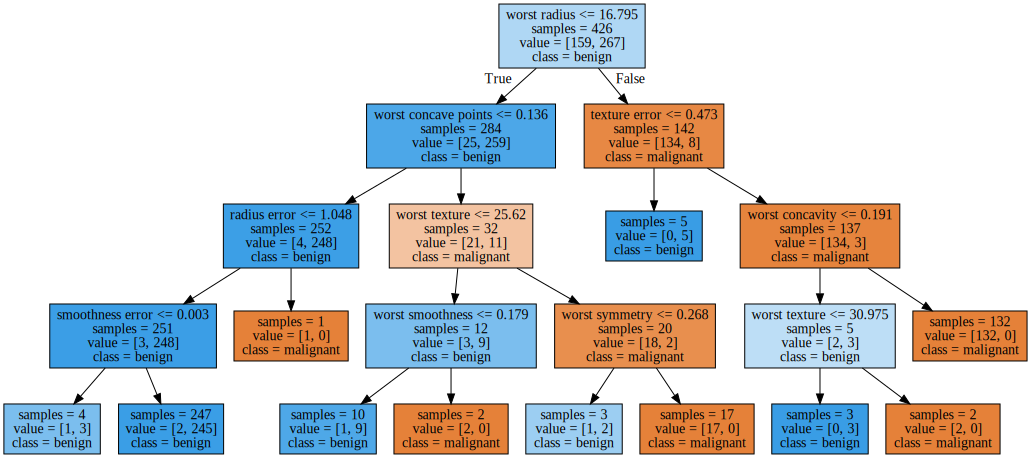

In [7]:
import graphviz
# 無い...
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [8]:
print('Feature importances: \n{}'.format(tree.feature_importances_))

Feature importances: 
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


In [9]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),cancer.feature_names)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
plot_feature_importances_cancer(tree)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Feature importances: [0. 1.]


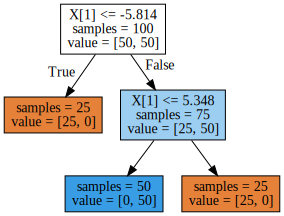

In [10]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

# DecisionTreeRegressor 決定木による回帰

In [11]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH,'ram_price.csv'))
plt.semilogy(ram_prices.date,ram_prices.price)
plt.xlabel('Year')
plt.ylabel('Price in $/Mbyte')

Text(0, 0.5, 'Price in $/Mbyte')